In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
for col in df.select_dtypes('object').columns:
    print(f"Column: {col}")
    unique_values = df[col].unique().tolist()
    for val in unique_values:
        print(f"- {val}")
    print("\n==============================================\n")

Column: gender
- female
- male


Column: race_ethnicity
- group B
- group C
- group A
- group D
- group E


Column: parental_level_of_education
- bachelor's degree
- some college
- master's degree
- associate's degree
- high school
- some high school


Column: lunch
- standard
- free/reduced


Column: test_preparation_course
- none
- completed




In [12]:
numerical_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes('object').columns

print(f"Numerical Features: {list(numerical_features)}")
print(f"Categorical Features: {list(categorical_features)}")

Numerical Features: ['math_score', 'reading_score', 'writing_score']
Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
# New numerical columns total and average
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = np.round(df['total_score']/3, 3)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.667
1,female,group C,some college,standard,completed,69,90,88,247,82.333
2,female,group B,master's degree,standard,none,90,95,93,278,92.667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333
4,male,group C,some college,standard,none,76,78,75,229,76.333


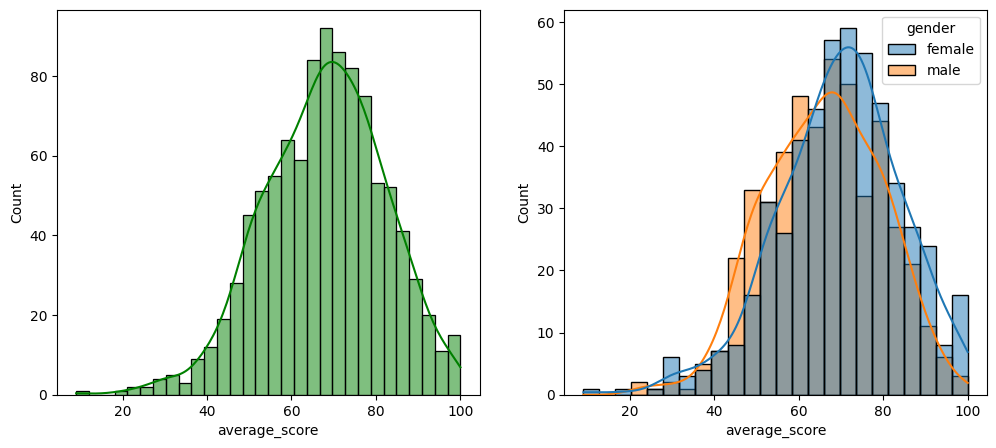

In [20]:
## Histogram plot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

<Axes: xlabel='average_score', ylabel='Count'>

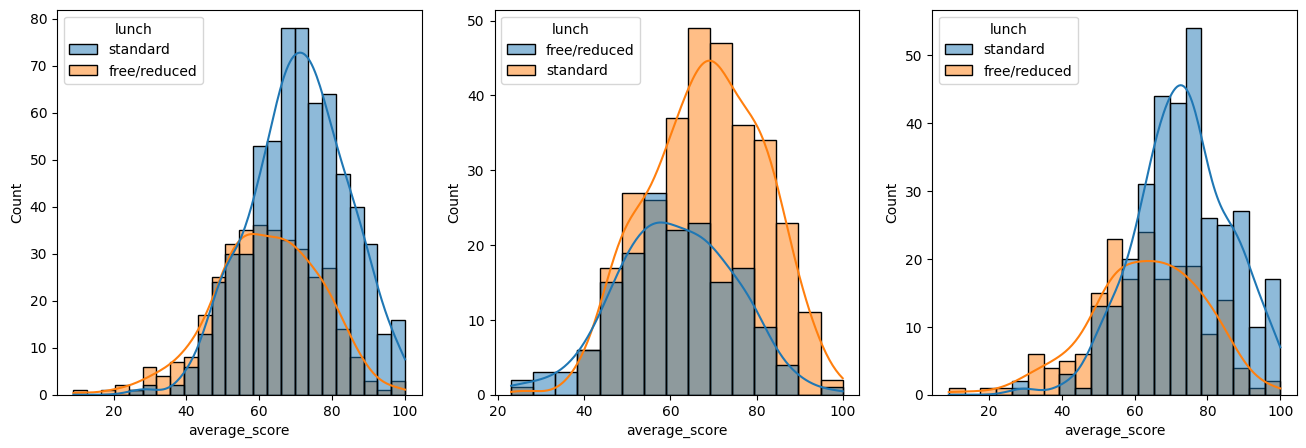

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x='average_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'], x='average_score', kde=True, hue='lunch')

<Axes: xlabel='average_score', ylabel='Count'>

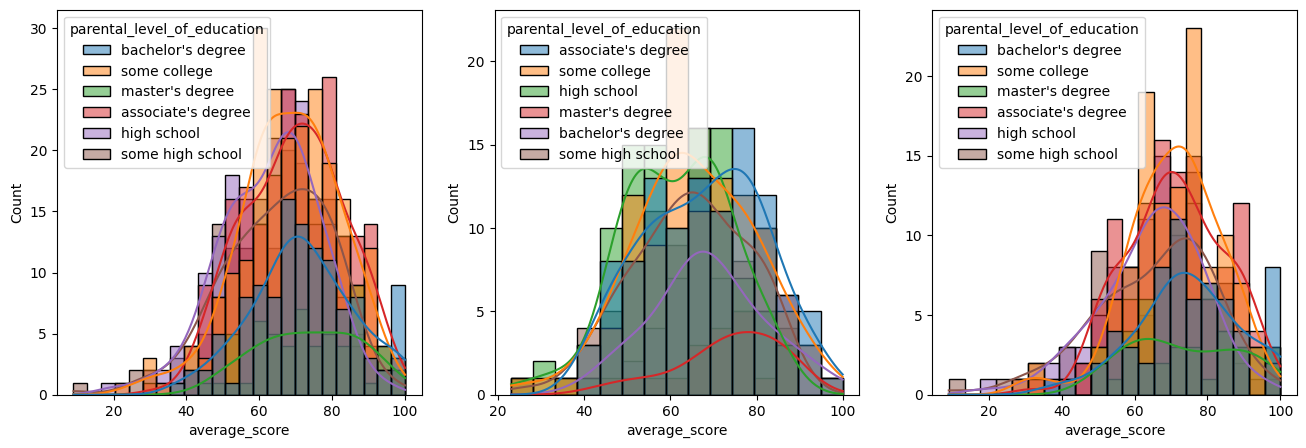

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'], x='average_score', kde=True, hue='parental_level_of_education')

<Axes: xlabel='average_score', ylabel='Count'>

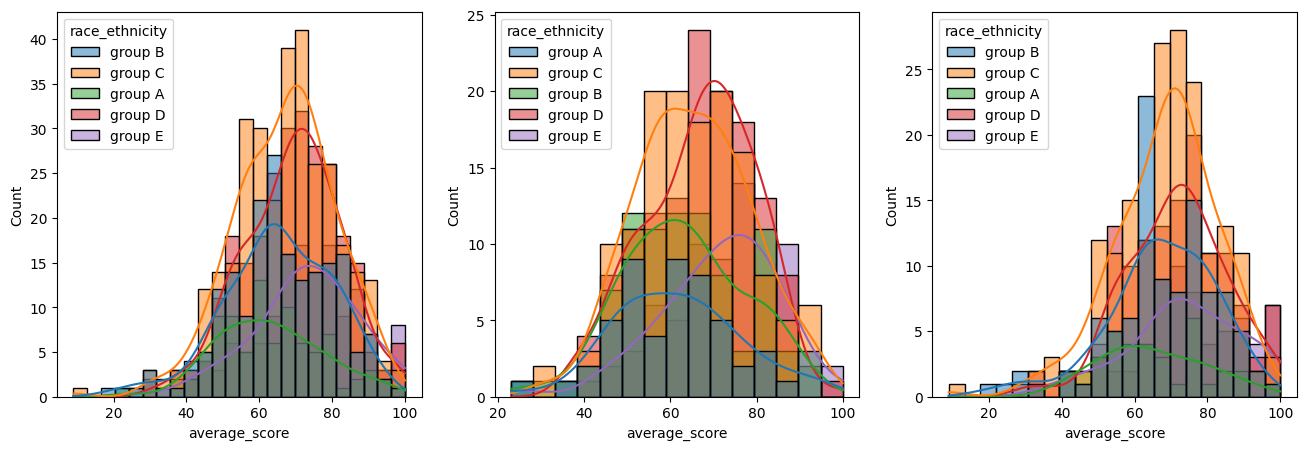

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'], x='average_score', kde=True, hue='race_ethnicity')

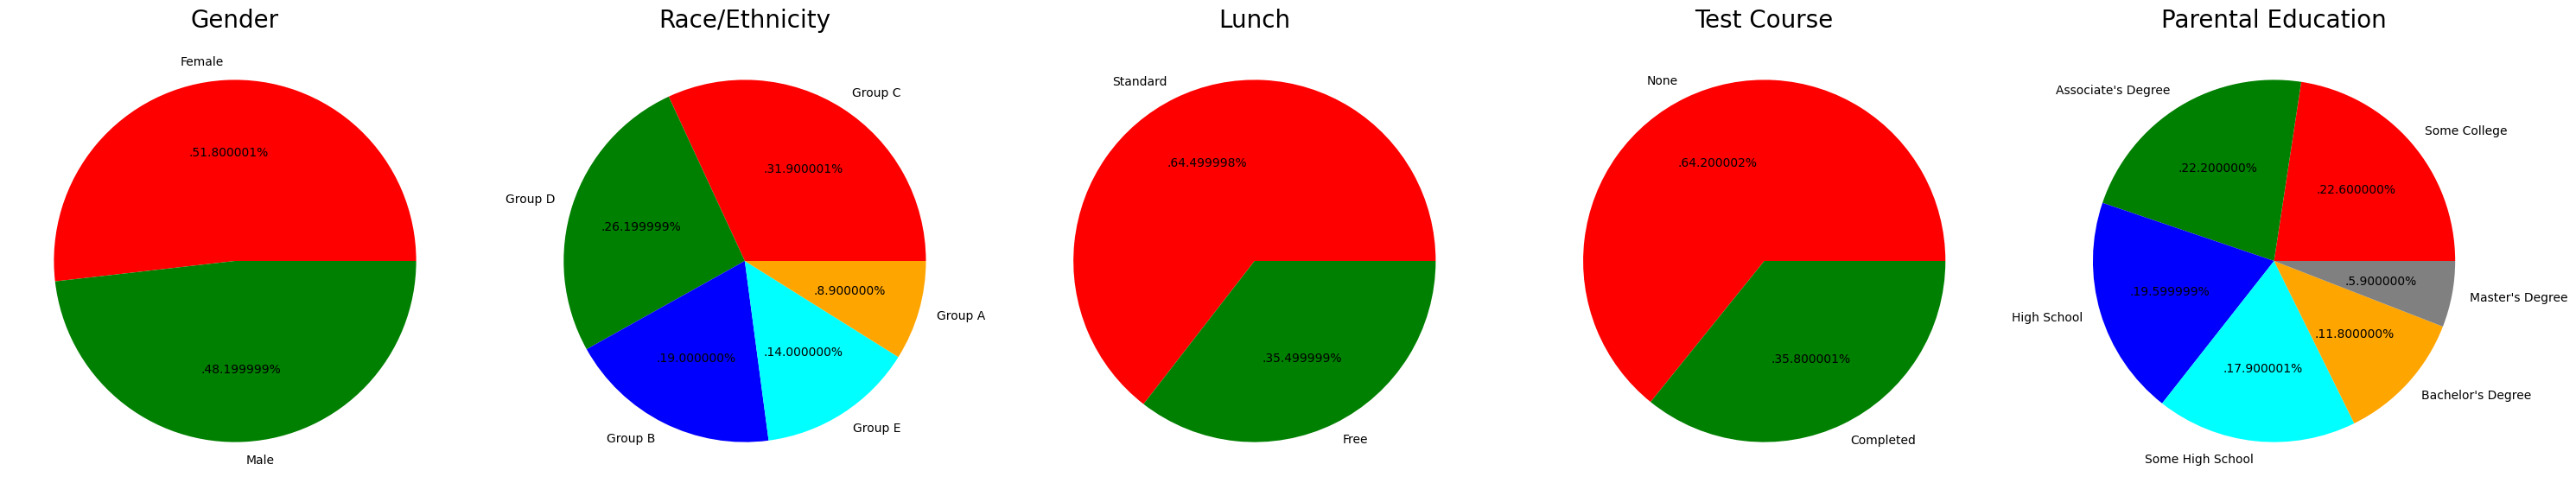

In [33]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()